In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

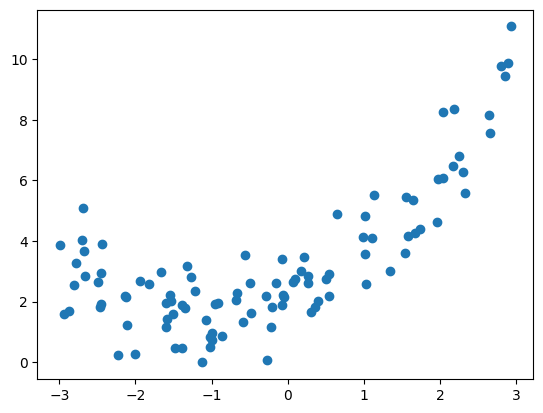

In [11]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)
# quadratic equation used as polynomial - randn is used to generate truly random distribution on both sides (positive and negative)
plt.scatter(X, y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lin_reg.predict(X_test)
score = r2_score(y_test, y_pred)
print(score)

0.4730465365493475


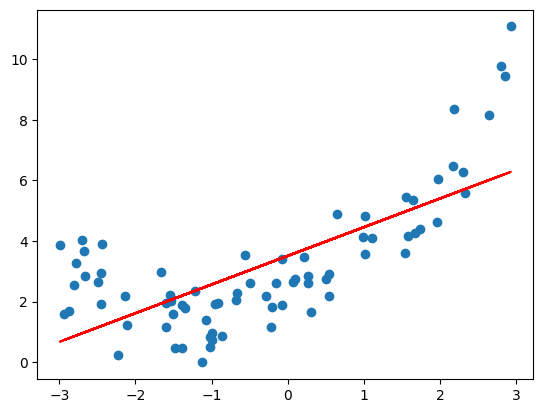

In [20]:
plt.plot(X_train, lin_reg.predict(X_train), "r-")
plt.scatter(X_train, y_train)

Not properly fitting - So, try to apply polynomial regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [22]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred_poly = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred_poly)
print(score)

0.8053698524123165


In [48]:
y_pred_poly.shape

(25, 1)

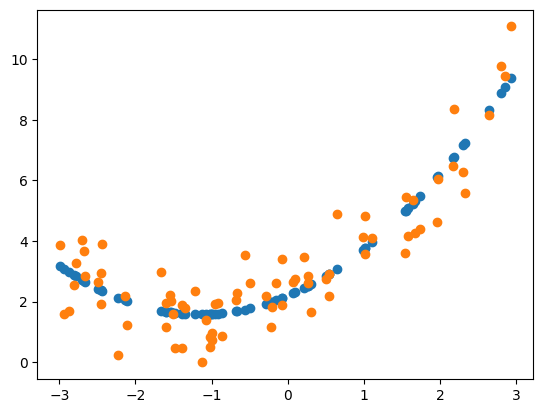

In [27]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [40]:
poly3_features = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly3 = poly3_features.fit_transform(X_train)
X_test_poly3 = poly3_features.transform(X_test)

In [43]:
regression3 = LinearRegression()
regression3.fit(X_train_poly3, y_train)
y_pred_poly3 = regression3.predict(X_test_poly3)
score3 = r2_score(y_test, y_pred_poly3)
print(score3)

0.8072199150708343


In [46]:
print(regression3.coef_)
print(regression.coef_)

[[0.         0.97492133 0.47762738 0.01893968]]
[[0.        1.078118  0.4698689]]


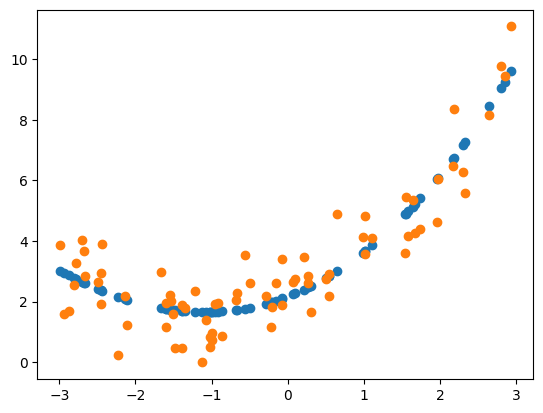

In [47]:
plt.scatter(X_train, regression3.predict(X_train_poly3))
plt.scatter(X_train, y_train)

Degree - 3 Accuracy slightly increased (0.805 to 0.807)

In [49]:
#Prediction of New data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly3_features.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

In [44]:
from sklearn.pipeline import Pipeline

In [67]:
def poly_regression(degree):
  X_new = np.linspace(-3, 3, 200).reshape(200, 1)

  poly_features = PolynomialFeatures(degree=degree, include_bias=True)
  lin_reg = LinearRegression()
  poly_regression_1 = Pipeline([
      ("poly_features", poly_features), ("lin_reg", lin_reg)
      ])

  poly_regression_1.fit(X_train, y_train)
  y_pred = poly_regression_1.predict(X_test)
  y_pred_new = poly_regression_1.predict(X_new)

  #Plotting prediction line
  # plt.plot(X_new, y_pred_new, "r", label = "Degree "+ str(degree), linewidth= 2)
  # plt.plot(X_train, y_train, "b.", linewidth = 3)
  # plt.plot(X_test, y_test, "g.", linewidth = 3)
  # plt.legend(loc="upper left")
  # plt.show()

  score = r2_score(y_test, y_pred)
  print(f"Degree: {degree} : {score}")







In [69]:
for i in range(1, 100):
  poly_regression(i)

Degree: 1 : 0.4730465365493475
Degree: 2 : 0.8053698524123165
Degree: 3 : 0.8072199150708343
Degree: 4 : 0.785258078970349
Degree: 5 : 0.7676678077226285
Degree: 6 : 0.7663682723985633
Degree: 7 : 0.768630389260567
Degree: 8 : 0.7686075796029912
Degree: 9 : 0.7752485689900428
Degree: 10 : 0.7760141578909452
Degree: 11 : 0.7746372010891395
Degree: 12 : 0.7628516315476364
Degree: 13 : 0.7760172981095587
Degree: 14 : 0.777345871262259
Degree: 15 : 0.7773852488244908
Degree: 16 : 0.7811579590082393
Degree: 17 : 0.7768311888478794
Degree: 18 : 0.7650431516455316
Degree: 19 : 0.7648492875735038
Degree: 20 : 0.7604870343575825
Degree: 21 : 0.7600342884451778
Degree: 22 : 0.7639275162390432
Degree: 23 : 0.775326411232388
Degree: 24 : 0.7577285932513421
Degree: 25 : 0.7653538009458093
Degree: 26 : 0.7393124074374893
Degree: 27 : 0.7521039767387387
Degree: 28 : 0.6686076840131596
Degree: 29 : 0.7581743430008533
Degree: 30 : 0.5752842013390129
Degree: 31 : 0.6127614412754966
Degree: 32 : -0.84964